In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [58]:
url = 'https://raw.githubusercontent.com/Onurbltc/InsuranceData/refs/heads/main/insurance.csv'

df = pd.read_csv(url)
df.head()

,Id,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,1,39.00,male,23.20,91,Yes,0,No,southeast,1121.87
1,2,24.00,male,30.10,87,No,0,No,southeast,1131.51
2,3,NaN,male,33.30,82,Yes,0,No,southeast,1135.94
3,4,NaN,male,33.70,80,No,0,No,northwest,1136.40
4,5,NaN,male,34.10,100,No,0,No,northwest,1137.01


In [59]:
pd.set_option("display.float_format", "{:.2f}".format)

In [60]:
sns.set(style="whitegrid", palette="Set2", color_codes=True, font_scale=1.2)

In [61]:
df.isna().sum().sum()

np.int64(8)

In [62]:
df.dropna(inplace=True)

In [63]:
df.describe(include='all')

,Id,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
count,1332.00,1332.00,1332,1332.00,1332.00,1332,1332.00,1332,1332,1332.00
unique,NaN,NaN,2,NaN,NaN,2,NaN,2,4,NaN
top,NaN,NaN,male,NaN,NaN,No,NaN,No,southeast,NaN
freq,NaN,NaN,670,NaN,NaN,695,NaN,1058,442,NaN
mean,674.47,38.09,NaN,30.66,94.19,NaN,1.10,NaN,NaN,13325.25
std,384.70,11.11,NaN,6.12,11.45,NaN,1.21,NaN,NaN,12109.62
min,1.00,18.00,NaN,16.00,80.00,NaN,0.00,NaN,NaN,1121.87
25%,341.75,29.00,NaN,26.20,86.00,NaN,0.00,NaN,NaN,4760.16
50%,674.50,38.00,NaN,30.35,92.00,NaN,1.00,NaN,NaN,9412.97
75%,1007.25,47.00,NaN,34.73,99.00,NaN,2.00,NaN,NaN,16781.33


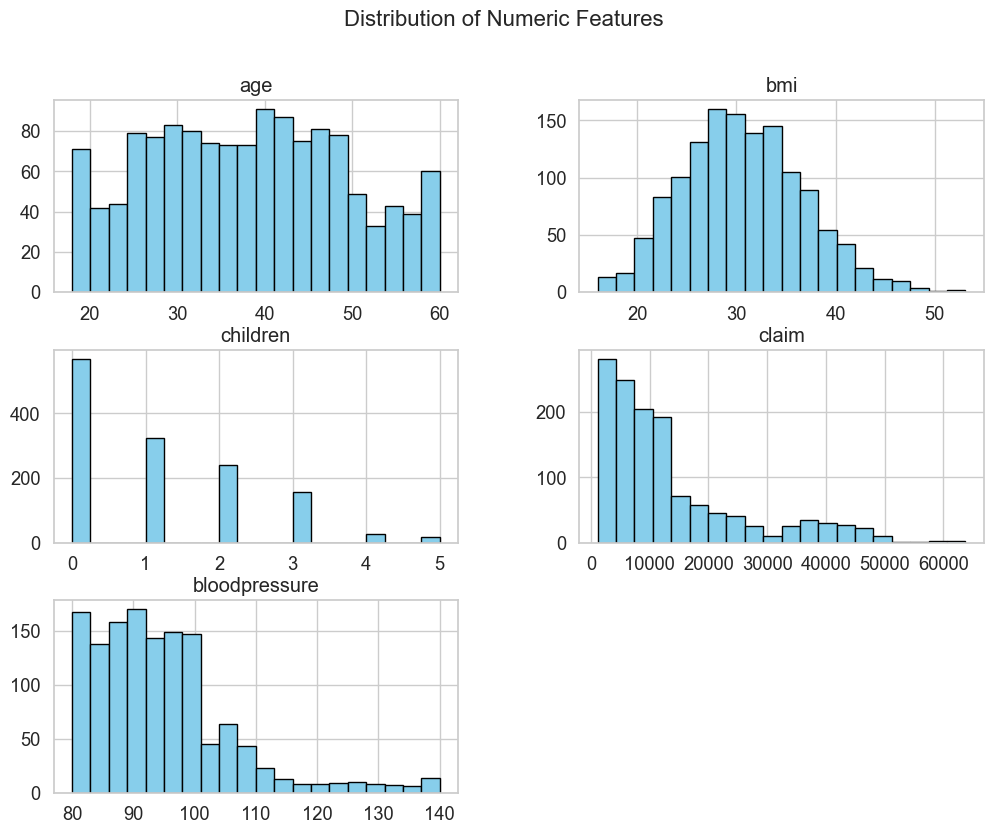

In [64]:
numeric_cols = ["age", "bmi", "children","claim", "bloodpressure"]
df[numeric_cols].hist(bins=20, figsize=(12, 9), color='skyblue', edgecolor='black')
plt.suptitle("Distribution of Numeric Features", fontsize=16)
plt.show()


In [65]:
import warnings
warnings.filterwarnings("ignore")

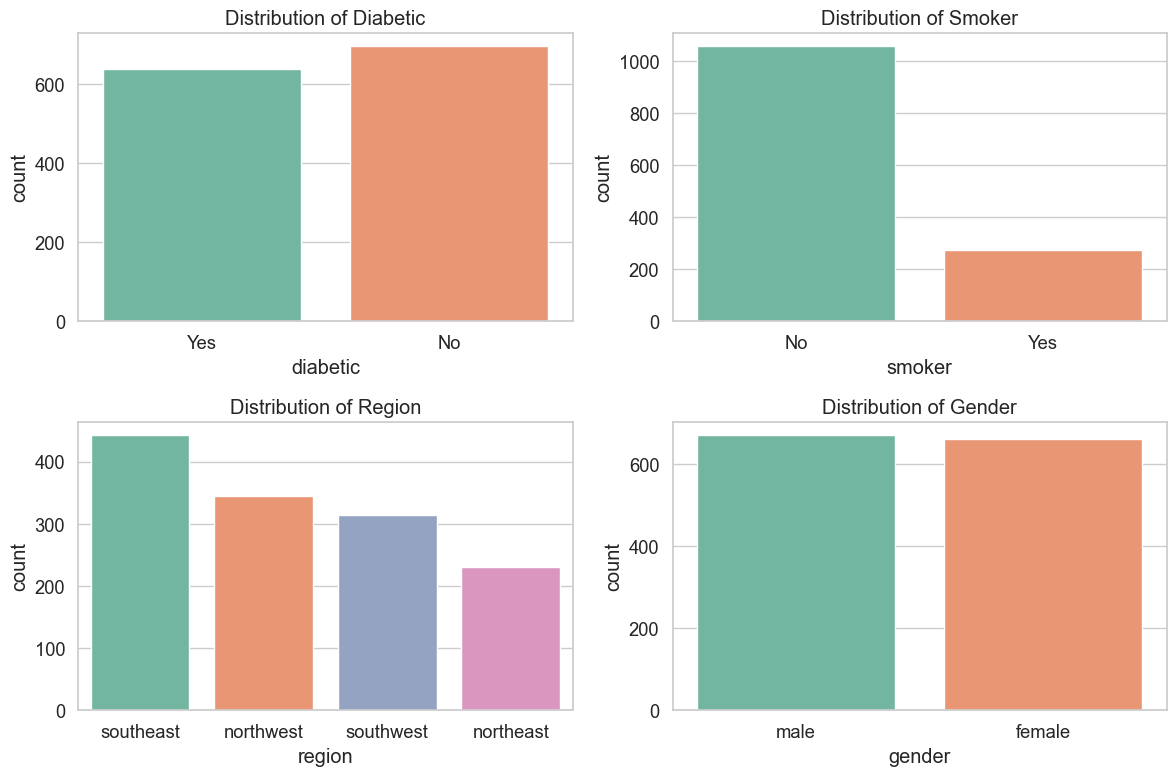

In [66]:
cate_cols = ["diabetic", "smoker", "region", "gender"]

plt.figure(figsize=(12, 8))

for i, col in enumerate(cate_cols, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=df, x=col, palette="Set2")
    plt.title(f'Distribution of {col.capitalize()}')
   
plt.tight_layout()
plt.show()
   

In [67]:
df.groupby(["gender", "smoker"])["claim"].mean().round(2)

gender  smoker
female  No        8762.30
        Yes      30679.00
male    No        8169.25
        Yes      33042.01
Name: claim, dtype: float64

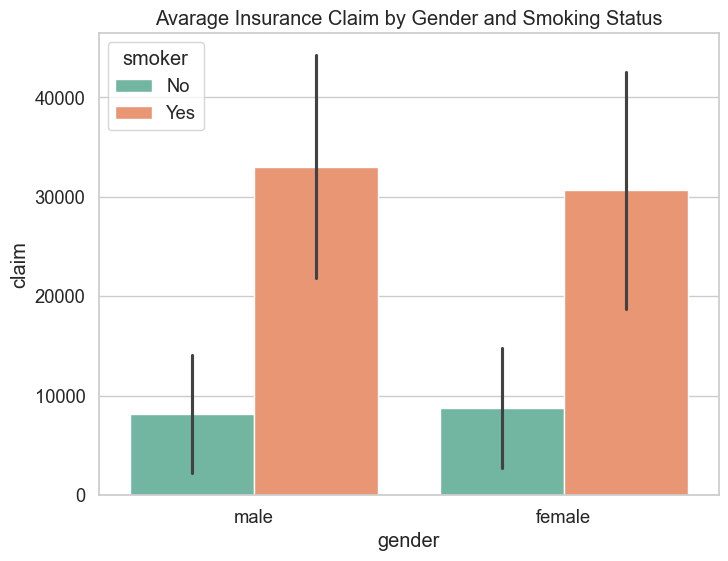

In [68]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x="gender", y="claim", hue="smoker", estimator="mean", errorbar="sd")
plt.title("Avarage Insurance Claim by Gender and Smoking Status")
plt.show()

In [69]:
pivot_region_diabetic = df.groupby(["region", "diabetic"])["claim"].mean().unstack()
pivot_region_diabetic

diabetic,No,Yes
region,,
northeast,16966.86,16818.30
northwest,11442.83,12224.96
southeast,13578.72,12574.09
southwest,13069.91,12313.74


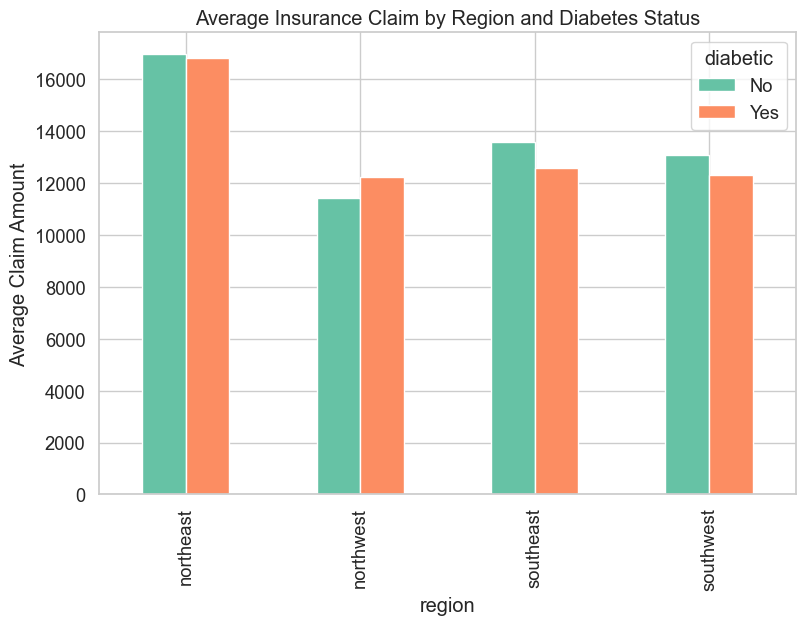

In [70]:
pivot_region_diabetic.plot(kind='bar', figsize=(9, 6))
plt.title("Average Insurance Claim by Region and Diabetes Status")
plt.ylabel("Average Claim Amount")
plt.show()

In [71]:
pivot_table = pd.pivot_table(df, values='claim', index='children', columns='diabetic', aggfunc=np.mean)
pivot_table

diabetic,No,Yes
children,,
0,12967.40,11985.29
1,12730.46,12732.06
2,15567.77,14579.36
3,13807.61,17091.26
4,14106.63,13573.35
5,8519.04,9205.59


In [72]:
numeric_cols

['age', 'bmi', 'children', 'claim', 'bloodpressure']

In [73]:
df[numeric_cols].corr()

,age,bmi,children,claim,bloodpressure
age,1.00,-0.04,-0.03,-0.03,-0.06
bmi,-0.04,1.00,0.01,0.20,0.14
children,-0.03,0.01,1.00,0.06,-0.03
claim,-0.03,0.20,0.06,1.00,0.53
bloodpressure,-0.06,0.14,-0.03,0.53,1.00


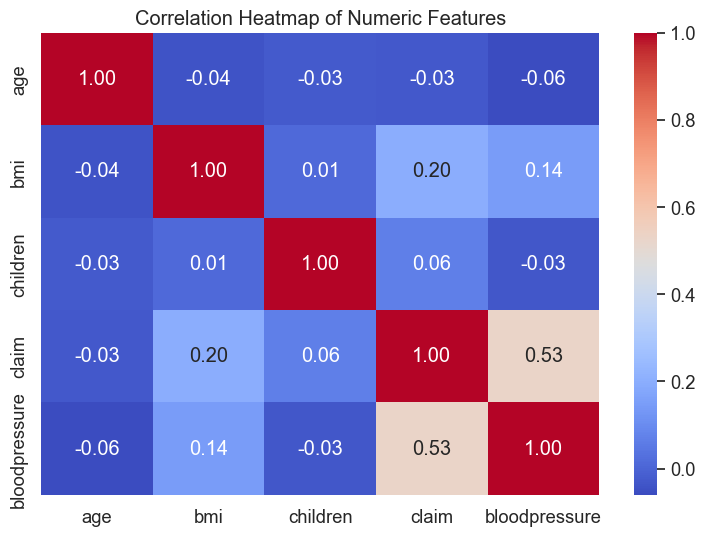

In [74]:
plt.figure(figsize=(9, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

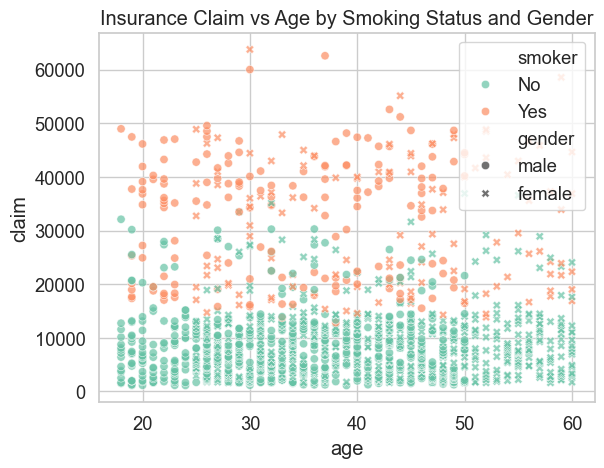

In [75]:
sns.scatterplot(data=df, x='age', y='claim', hue='smoker', style='gender', alpha=0.7)
plt.title("Insurance Claim vs Age by Smoking Status and Gender")
plt.show()

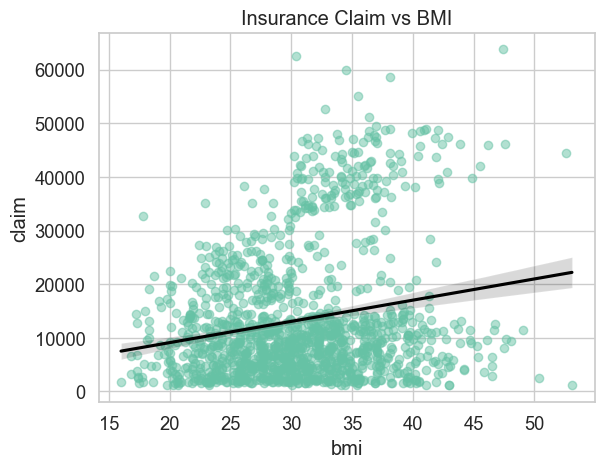

In [76]:
sns.regplot(data=df, x='bmi', y='claim', scatter_kws={'alpha':0.5}, line_kws={'color':'black'})
plt.title("Insurance Claim vs BMI")
plt.show()

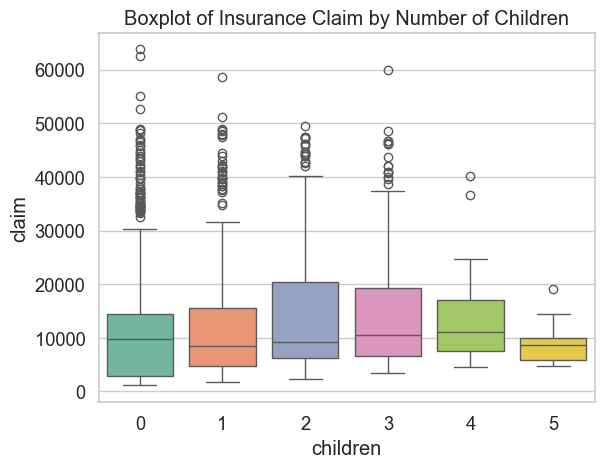

In [77]:
sns.boxplot(data=df, x='children', y='claim', palette='Set2')
plt.title("Boxplot of Insurance Claim by Number of Children")
plt.show()

In [78]:
df["age_group"] = pd.cut(df["age"], bins=[0, 17, 30, 45, 60, 100], labels=["<18", "18-30", "31-45", "46-60", "61+"])

In [79]:
df["age_group"].value_counts()

age_group
31-45    553
18-30    396
46-60    383
<18        0
61+        0
Name: count, dtype: int64

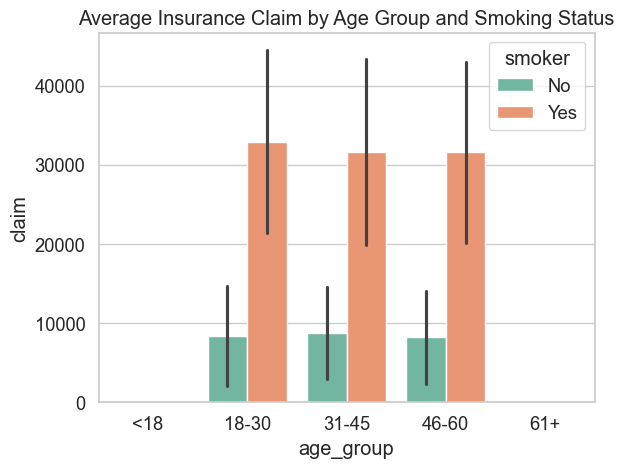

In [80]:
sns.barplot(data=df, x="age_group", y="claim", hue="smoker", estimator="mean", errorbar="sd")
plt.title("Average Insurance Claim by Age Group and Smoking Status")
plt.show()

In [81]:
df["bmi_category"] = pd.cut(df["bmi"], bins=[0, 18.5, 24.9, 29.9, 100], labels=["Underweight", "Normal", "Overweight", "Obese"])
df["bmi_category"].value_counts()

bmi_category
Obese          702
Overweight     387
Normal         222
Underweight     21
Name: count, dtype: int64

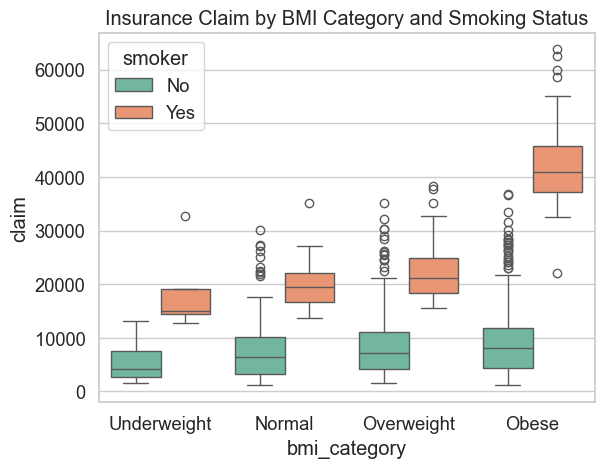

In [82]:
sns.boxplot(data=df, x="bmi_category", y="claim", hue="smoker", palette="Set2")
plt.title("Insurance Claim by BMI Category and Smoking Status")
plt.show()

In [83]:
region_stats = df.groupby("region").agg(
    smoker_rate=("smoker", lambda x: (x == 'Yes').mean() * 100),
    mean_claim=("claim", "mean")
).reset_index()

In [84]:
df['smoker'].unique()

array(['No', 'Yes'], dtype=object)

In [85]:
region_stats

,region,smoker_rate,mean_claim
0,northeast,29.00,16889.04
1,northwest,16.81,11794.22
2,southeast,20.59,13085.50
3,southwest,18.47,12723.13


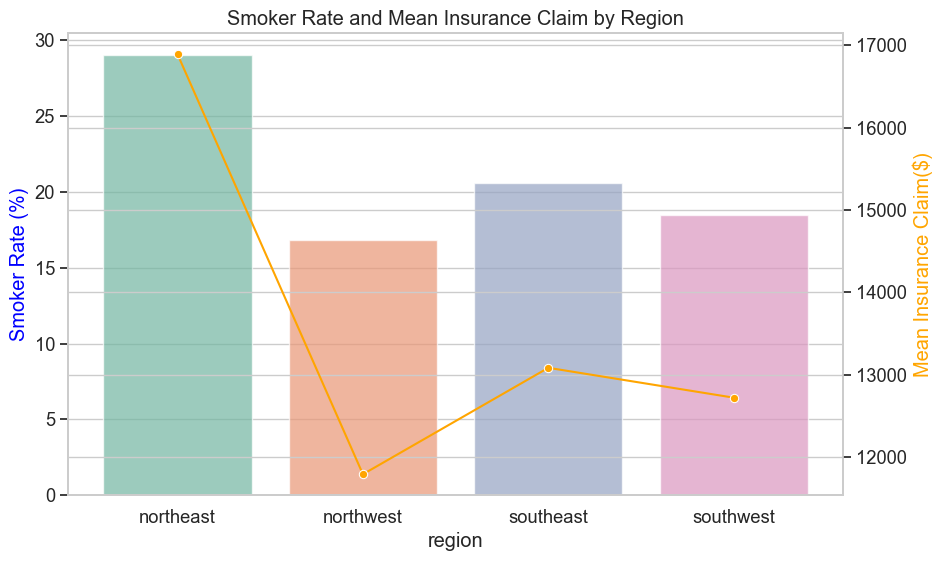

In [86]:
fig, ax1 = plt.subplots(figsize=(10, 6))
sns.barplot(data=region_stats, x="region", y="smoker_rate", ax=ax1, alpha=0.7, palette="Set2")
ax2 = ax1.twinx()
sns.lineplot(data=region_stats, x="region", y="mean_claim", ax=ax2, marker="o", color='orange')

ax1.set_ylabel("Smoker Rate (%)", color='blue')
ax2.set_ylabel("Mean Insurance Claim($)", color='orange')
plt.title("Smoker Rate and Mean Insurance Claim by Region")
plt.show()